In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly_express as px
from scipy.stats import percentileofscore
import pdfplumber

In [73]:

# pdf = pdfplumber.open(r'C:\Data-Science\neet_tg_ranks_2024.pdf')

# columns = []
# data = []
# for i in range(2, len(pdf.pages)):
#     page_data = pdf.pages[i].extract_tables()

#     print("page-id:",i)
#     if not columns:
#         columns = page_data[0][0]

#     for i in range(1, len(page_data[0])):
#         data.append(page_data[0][i])

# neet_tg_ranks_df = pd.DataFrame(data=data, columns=columns)
# neet_tg_ranks_df.to_csv('./neet_tg_data_2024.csv', index=False)

In [74]:
neet_tg_ranks_df = pd.read_csv(r'C:\Data-Science\neet_tg_data_2024.csv',)

In [75]:
df_columns = neet_tg_ranks_df.columns
df_columns
new_columns = {}
for i in range(len(df_columns)):
    new_columns[df_columns[i]] = df_columns[i].replace('\n', '_').replace(' ','_').replace('.', '')

new_columns

{'S.No': 'SNo',
 'NEET\nRank': 'NEET_Rank',
 'ROLL': 'ROLL',
 'Name': 'Name',
 'Gender': 'Gender',
 'Category': 'Category',
 'PH': 'PH',
 'Score': 'Score'}

In [76]:
neet_tg_ranks_df.rename(columns=new_columns, inplace=True)

In [77]:
neet_tg_ranks_df.head() 

,SNo,NEET_Rank,ROLL,Name,Gender,Category,PH,Score
0,102,5200,4204040167,SINGANAMALLA JAYA AKASH,Male,General,No,685
1,103,5358,4208090053,KASAPURAM ABHINAV,Male,OBC-(NCL) As Per Central List,No,685
2,104,5487,3115230253,SURA SHASHIDHAR,Male,OBC-(NCL) As Per Central List,No,685
3,105,5647,3903250656,POOJA,Female,OBC-(NCL) As Per Central List,No,685
4,106,5860,4201480273,GUNDETI ARTI,Female,General,No,683


In [78]:
neet_tg_ranks_df['Score'].describe()

count    49083.000000
mean       306.060041
std        128.538851
min        127.000000
25%        195.000000
50%        289.000000
75%        398.000000
max        685.000000
Name: Score, dtype: float64

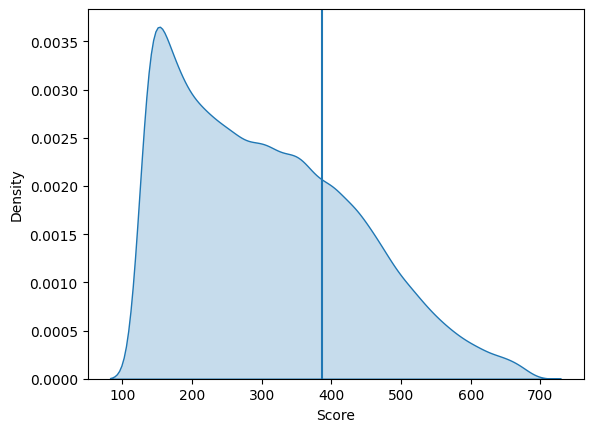

In [79]:
sns.kdeplot(data=neet_tg_ranks_df['Score'],fill=True)
plt.axvline(x=387)

total students >= 510 is  3792


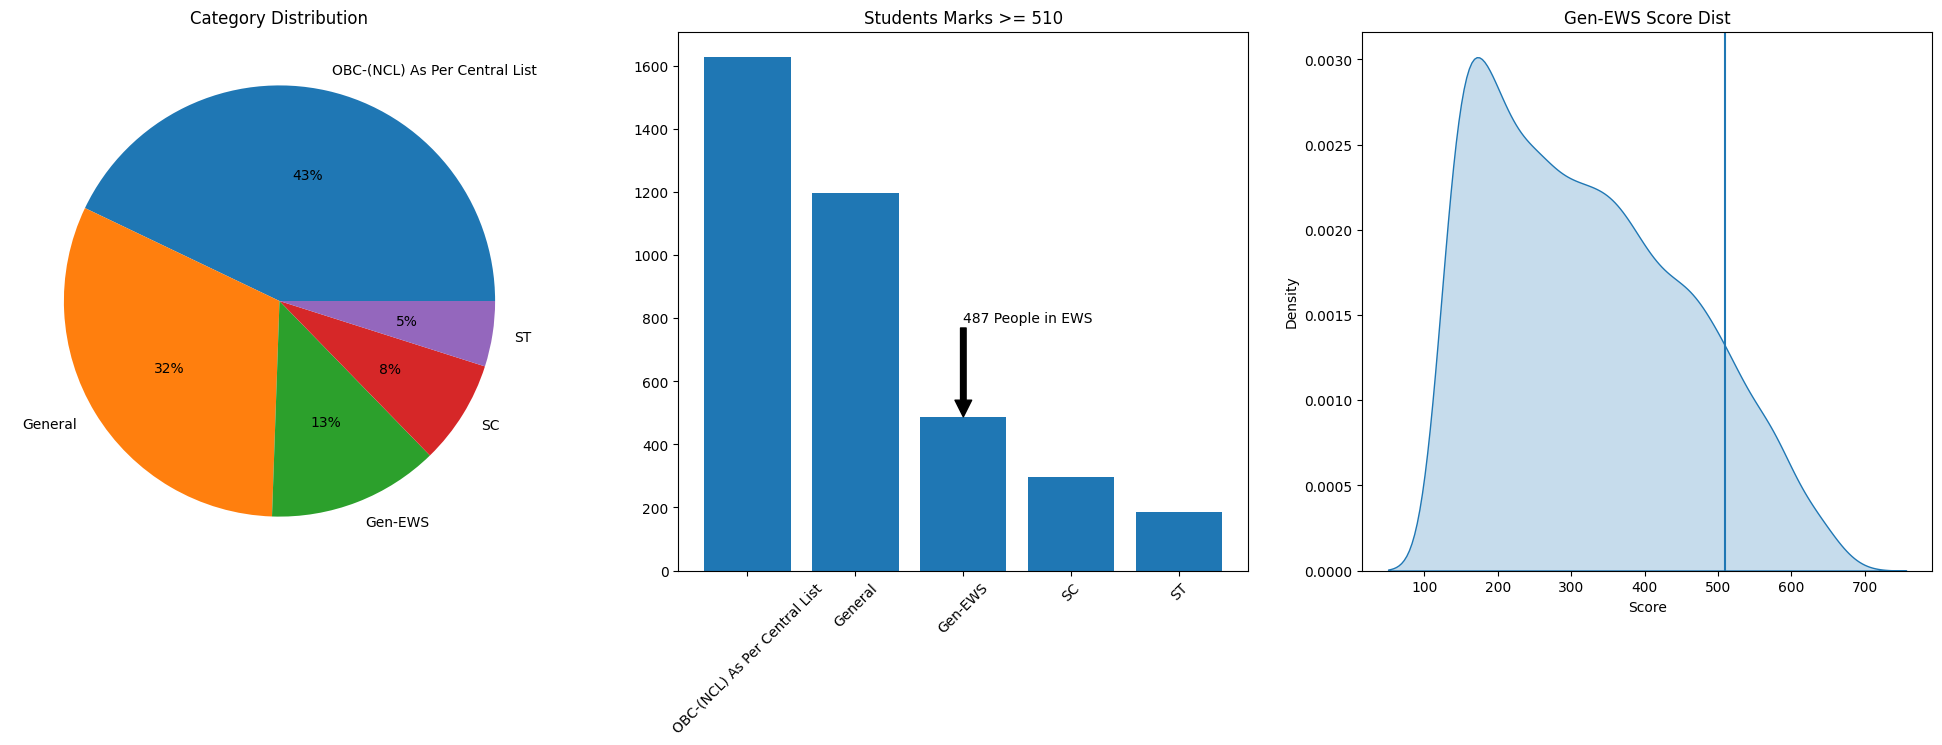

In [84]:
mark = 510
filtered_df = neet_tg_ranks_df[neet_tg_ranks_df['Score'] >= mark]
print(f"total students >= {mark} is ", filtered_df.shape[0])
df = filtered_df['Category'].value_counts().reset_index()
plt.figure(figsize=(25, 7))
ax1 = plt.subplot(1, 3, 1)
ax1.pie(df['count'], autopct=r"%.0f%%",labels=df['Category'], explode=[0.0, 0.0, 0.0, 0.0, 0.0])
plt.title("Category Distribution")
ax2 = plt.subplot(1, 3, 2)
ax2.bar(df['Category'],df['count'])
ax2.set_title(f'Students Marks >= {mark}')
ax2.annotate(f"{df[df['Category'] == 'Gen-EWS']['count'].values[0]} People in EWS",('Gen-EWS', df[df['Category'] == 'Gen-EWS']['count'].values[0]),('Gen-EWS', df[df['Category'] == 'Gen-EWS']['count'].values[0] + 300),arrowprops=dict(facecolor='black'))
ax2.tick_params(axis='x',rotation=45)
ax3 = plt.subplot(1, 3, 3)
sns.kdeplot(ax=ax3, data=neet_tg_ranks_df[neet_tg_ranks_df['Category'] == 'Gen-EWS']['Score'],fill=True)
ax3.axvline(x=mark)
ax3.set_title("Gen-EWS Score Dist")
plt.show()

In [81]:
filtered_df.loc[:,'marks_bins'] = pd.cut(filtered_df['Score'],bins=[350, 400, 450, 500, 550, 600, 650, 700, 720], labels=['350-400', '400-450', '450-500', '500-550', '550-600', '600-650', '650-700','700-720'])
filtered_df

C:\Users\nkrahul\AppData\Local\Temp\ipykernel_11576\1384170450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'marks_bins'] = pd.cut(filtered_df['Score'],bins=[350, 400, 450, 500, 550, 600, 650, 700, 720], labels=['350-400', '400-450', '450-500', '500-550', '550-600', '600-650', '650-700','700-720'])


,SNo,NEET_Rank,ROLL,Name,Gender,Category,PH,Score,marks_bins
0,102,5200,4204040167,SINGANAMALLA JAYA AKASH,Male,General,No,685,650-700
1,103,5358,4208090053,KASAPURAM ABHINAV,Male,OBC-(NCL) As Per Central List,No,685,650-700
2,104,5487,3115230253,SURA SHASHIDHAR,Male,OBC-(NCL) As Per Central List,No,685,650-700
3,105,5647,3903250656,POOJA,Female,OBC-(NCL) As Per Central List,No,685,650-700
4,106,5860,4201480273,GUNDETI ARTI,Female,General,No,683,650-700
...,...,...,...,...,...,...,...,...,...
3079,3181,170049,4201240053,FARHA FATIMA,Female,General,No,525,500-550
3080,3182,170073,4208030382,JINNA MEDHA SREE,Female,OBC-(NCL) As Per Central List,No,525,500-550
3081,3183,170340,4201190313,V SHRIYA,Female,ST,No,525,500-550
3082,3184,170466,4203010536,DANTU ANISHKA,Female,OBC-(NCL) As Per Central List,No,525,500-550


In [82]:
pd.pivot_table(data= filtered_df, index='marks_bins',columns=['Category'],values='Name',aggfunc='count')

C:\Users\nkrahul\AppData\Local\Temp\ipykernel_11576\3295203746.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data= filtered_df, index='marks_bins',columns=['Category'],values='Name',aggfunc='count')


Category,Gen-EWS,General,OBC-(NCL) As Per Central List,SC,ST
marks_bins,,,,,
350-400,0,0,0,0,0
400-450,0,0,0,0,0
450-500,0,0,0,0,0
500-550,108,258,415,85,51
550-600,181,348,541,85,55
600-650,85,286,259,40,18
650-700,18,134,94,11,12
700-720,0,0,0,0,0


C:\Users\nkrahul\AppData\Local\Temp\ipykernel_11576\2245109241.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(data= filtered_df, index='marks_bins',columns=['Category'],values='Name',aggfunc='count').plot(kind='bar',ylabel='Total Students', xlabel='marks range')


<Axes: xlabel='marks range', ylabel='Total Students'>

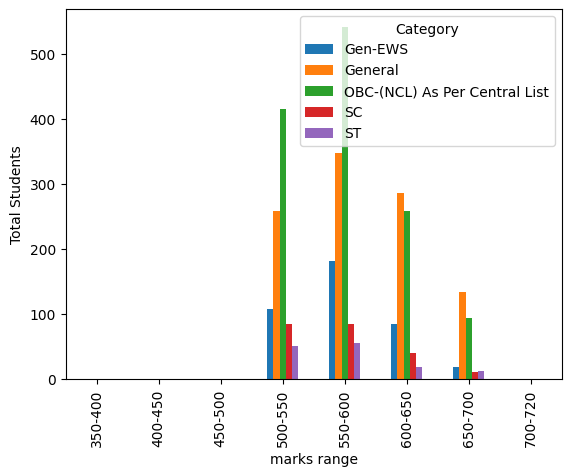

In [83]:
pd.pivot_table(data= filtered_df, index='marks_bins',columns=['Category'],values='Name',aggfunc='count').plot(kind='bar',ylabel='Total Students', xlabel='marks range')